In [1]:
2+2

4

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [18]:
x,y =make_moons(n_samples=1000,noise=0.2)

In [19]:
df = {'x1':x[:,0],'x2':x[:,1],'y':y}

In [20]:
dataset= pd.DataFrame(df)

In [21]:
dataset

,x1,x2,y
0,1.031204,-0.465077,1
1,1.090087,-0.609052,1
2,0.991513,-0.046176,0
3,1.631210,-0.478082,1
4,-0.316472,0.882473,0
...,...,...,...
995,-0.512273,0.257935,1
996,0.129276,0.778126,0
997,0.113954,-0.498335,1
998,-1.271644,0.355195,0


<Axes: xlabel='x1', ylabel='x2'>

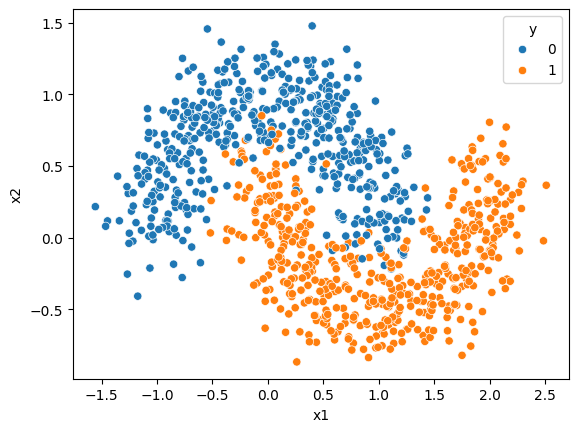

In [22]:
sns.scatterplot(x=dataset["x1"],y=dataset["x2"],hue=dataset["y"])

In [24]:
x_a = dataset[["x1","x2"]]
x_a

,x1,x2
0,1.031204,-0.465077
1,1.090087,-0.609052
2,0.991513,-0.046176
3,1.631210,-0.478082
4,-0.316472,0.882473
...,...,...
995,-0.512273,0.257935
996,0.129276,0.778126
997,0.113954,-0.498335
998,-1.271644,0.355195


In [26]:
y_a = dataset["y"]
y_a

0      1
1      1
2      0
3      1
4      0
      ..
995    1
996    0
997    1
998    0
999    1
Name: y, Length: 1000, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,train_size=0.3,random_state=43)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [31]:
d1 = DecisionTreeClassifier()
d1.fit(x_train,y_train)
d1.score(x_train,y_train)*100,d1.score(x_test,y_test)*100

(100.0, 94.0)

In [32]:
cl1 = SVC()
cl1.fit(x_train,y_train)
cl1.score(x_train,y_train)*100,cl1.score(x_test,y_test)*100

(95.66666666666667, 96.42857142857143)

In [33]:
gnb1 = GaussianNB()
gnb1.fit(x_train,y_train)
gnb1.score(x_train,y_train)*100,gnb1.score(x_test,y_test)*100

(84.33333333333334, 86.71428571428571)

## ensemble techinque

In [34]:
from sklearn.ensemble import VotingClassifier

In [36]:
l1=  [('dt1',DecisionTreeClassifier()),('svr1',SVC()),('gnb',GaussianNB())]

In [41]:
v1 = VotingClassifier(l1) # using DecisionTree , SVM, and GaussianNB models
v1.fit(x_train,y_train)
v1.score(x_train,y_train)*100, v1.score(x_test,y_test)*100

# this technique giving good acuracy

(96.33333333333334, 96.28571428571429)

In [42]:
pred = {'dt':d1.predict(x_test),'svm':cl1.predict(x_test),'gnb':gnb1.predict(x_test),'vc':v1.predict(x_test)}

In [43]:
pd.DataFrame(pred)

,dt,svm,gnb,vc
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
695,0,0,0,0
696,1,1,0,1
697,0,0,1,0
698,0,0,0,0
